In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from dlp.dataset import Dataset

from utils import CNNDataProcessor

In [2]:
# Load dataset
ds = Dataset()

home_path = str(Path.home()) + '/GithubRepos'
ds.load(home_path + '/dlp-dataset/data/DJI_0012')

In [5]:
scene = ds.get('scene', ds.list_scenes()[0])
frame = ds.get_future_frames(scene['first_frame'],timesteps=300)[80]
all_instance_tokens = frame['instances']
#all_instance_tokens

In [8]:
ds.get('scene', ds.list_scenes()[]0)

['66045def24565e370dff814aa01e8ffed07318b9']

In [3]:
extractor = CNNDataProcessor(ds = ds)

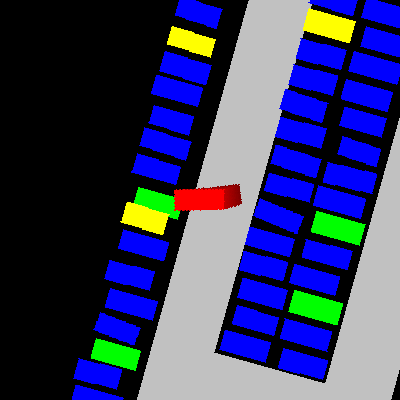

In [4]:
scene = ds.get('scene', ds.list_scenes()[0])
frame = ds.get_future_frames(scene['first_frame'],timesteps=300)[80]
inst_token = frame['instances'][1]

instance = ds.get('instance', inst_token)
current_state = np.array([instance['coords'][0], instance['coords'][1], instance['heading'], instance['speed']])

img_frame = extractor.vis.plot_frame(frame['frame_token'])
img = extractor.vis.inst_centric(img_frame, inst_token)
display(img)

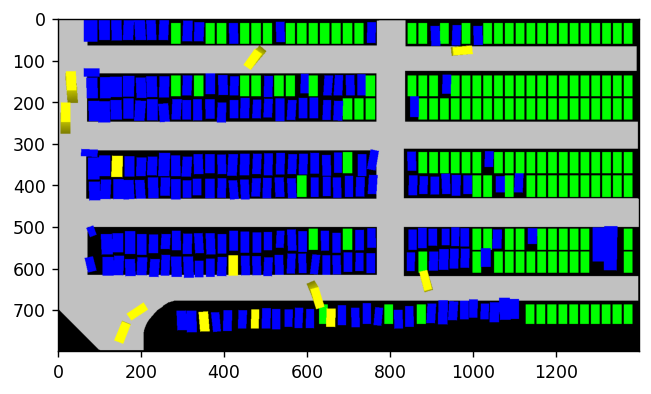

In [26]:
plt.imshow(np.array(img_frame))

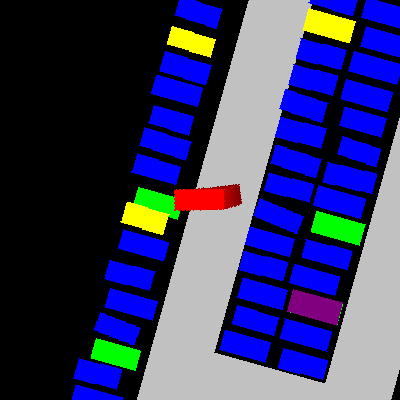

In [5]:

all_spots = extractor.get_parking_spots_from_instance(inst_token, frame)
spot_centers = extractor.detect_center(inst_token, 'spot')
#selected_spot_index = extractor.get_intent_label(inst_token, spot_centers)
labeled_img = extractor.label_spot(all_spots[1], inst_token, frame)
display(labeled_img)
